In [1]:
from viz import show_field
import numpy as np
import pandas as pd

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('s44000-49501.csv')

In [4]:
df.id = np.arange(44000, 49501)

In [90]:
test_df = pd.read_csv('resources/test.csv')

In [8]:
test_subdf = test_df.iloc[43999:, :]

In [9]:
test_subdf.head()

,id,delta,stop.1,stop.2,stop.3,stop.4,stop.5,stop.6,stop.7,stop.8,...,stop.391,stop.392,stop.393,stop.394,stop.395,stop.396,stop.397,stop.398,stop.399,stop.400
43999,44000,3,0,0,0,1,1,0,1,0,...,0,1,1,0,1,1,0,0,0,0
44000,44001,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44001,44002,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44002,44003,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44003,44004,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test_sample = test_subdf.iloc[0, :]

In [16]:
test_board = test_sample.iloc[2:]

In [20]:
test_board = test_board.values.reshape((20, 20)).astype('uint8')

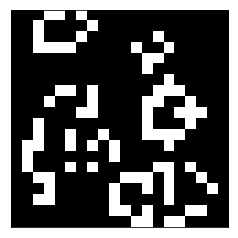

In [21]:
show_field(test_board)

In [45]:
solved_sample = df.iloc[0, :]
solved_board = solved_sample.iloc[2:].values.reshape((20, 20)).astype('uint8')
print("Percent that both boards should match:", solved_sample[1])

Percent that both boards should match: 99


In [30]:
import pyximport
pyximport.install(language_level=3)
import life

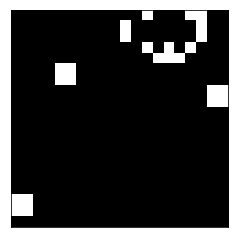

In [41]:
show_field(life.make_move(solved_board, test_sample[1].astype('uint8')))

In [42]:
s2 = test_subdf.iloc[1, :]
s2_board = s2[2:].values.reshape((20, 20)).astype('uint8')

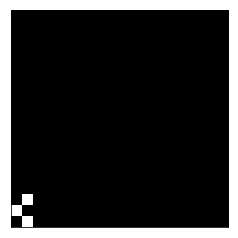

In [43]:
show_field(s2_board)

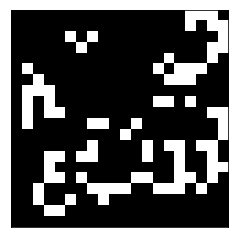

In [44]:
s3 = test_subdf.iloc[2, :]
s3_board = s3[2:].values.reshape((20, 20)).astype('uint8')
show_field(s3_board)

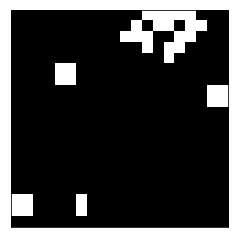

In [46]:
s0 = test_df.iloc[0, :]
s0_board = s0[2:].values.reshape((20, 20)).astype('uint8')
show_field(s0_board)

In [47]:
from GeneticSolver import parallel_fitness

In [80]:
parallel_fitness(solved_board, s0_board, s0[1])

0.995

In [50]:
# test 2
sol2 = df.iloc[1, :]
sol2_board = sol2[2:].values.reshape((20, 20)).astype('uint8')
sol2_score = sol2[1]
sol2_score

99

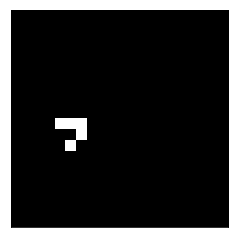

In [53]:
s1 = test_df.iloc[1, :]
s1_board = s1[2:].values.reshape((20, 20)).astype('uint8')
show_field(s1_board)

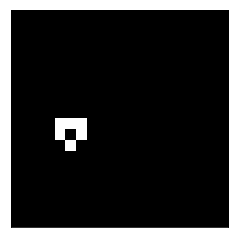

In [55]:
show_field(life.make_move(sol2_board, s1[1]))

In [56]:
parallel_fitness(sol2_board, s1_board, s1[1])

0.9975

In [74]:
# test 3
sol3 = df.iloc[2, :]
sol3_board = sol3[2:].values.reshape((20, 20)).astype('uint8')
sol3_score = sol3[1]
sol3_score

100

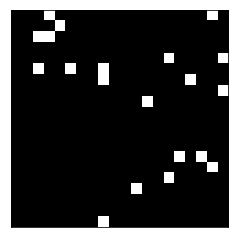

In [78]:
s2 = test_df.iloc[2, :]
s2_board = s2[1:].values.reshape((20, 20)).astype('uint8')
show_field(s2_board)

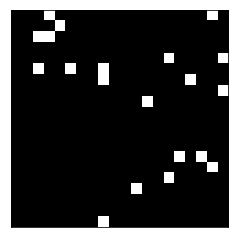

In [79]:
show_field(life.make_move(sol3_board, s2[1]))

In [83]:
sol_last = df.iloc[-1, :]
board_sol_last = sol_last[2:].values.reshape((20, 20)).astype('uint8')
sol_score = sol_last[1]
sol_score

95

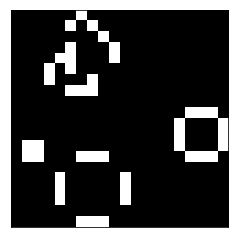

In [94]:
slast = test_df.iloc[5500, :]
board_slast = slast[2:].values.reshape((20, 20)).astype('uint8')
show_field(board_slast)

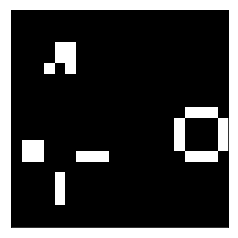

In [95]:
show_field(life.make_move(board_sol_last, slast[1]))

In [96]:
parallel_fitness(board_sol_last, board_slast, slast[1])

0.955

In [101]:
df[subcols].values

array([[   1,    0,    0, ...,    0,    0,    0],
       [   2,    0,    0, ...,    0,    1,    0],
       [   3,    0,    0, ...,    0,    0,    0],
       ...,
       [5499,    0,    0, ...,    0,    0,    0],
       [5500,    0,    0, ...,    0,    0,    0],
       [5501,    0,    0, ...,    0,    0,    0]])

In [60]:
def prepare_submit():
    """ Generate zero-filled dataframe with proper columns and id """
    df =  pd.DataFrame(np.zeros((50000, 401), 'uint8'), columns=['id'] + ['start.' + str(_) for _ in range(1, 401)])
    df.iloc[:, 0] = np.arange(1, 50001)
    return df

In [122]:
test_df = prepare_submit()

In [123]:
test_df.head()

,id,start.1,start.2,start.3,start.4,start.5,start.6,start.7,start.8,start.9,...,start.391,start.392,start.393,start.394,start.395,start.396,start.397,start.398,start.399,start.400
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
subcols = [_ for _ in df.columns if _ != 'score']

In [125]:
df.id = np.arange(2, 5503)

In [126]:
test_df.iloc[1:5502, :] = (df[subcols]).values

In [127]:
test_df.iloc[:5501, :].shape

(5501, 401)

In [128]:
test_df.head()

,id,start.1,start.2,start.3,start.4,start.5,start.6,start.7,start.8,start.9,...,start.391,start.392,start.393,start.394,start.395,start.396,start.397,start.398,start.399,start.400
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
test_df = test_df.astype('uint32')

In [130]:
test_df.to_csv('result.csv', index=False)

In [102]:
tdf = pd.read_csv('resources/test.csv', index_col='id', skiprows=range(44000, 49501))  # Here range should always start from zero

In [113]:
tdf.index[:5000]

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000],
           dtype='int64', name='id', length=5000)

In [121]:
tdf.head(5505)

,delta,stop.1,stop.2,stop.3,stop.4,stop.5,stop.6,stop.7,stop.8,stop.9,...,stop.391,stop.392,stop.393,stop.394,stop.395,stop.396,stop.397,stop.398,stop.399,stop.400
id,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
